In [1]:
%cd ..

/home/kobayashi/project/NML_Discrete_Model


In [2]:
import math
import random
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt

## 実験1

In [26]:
df1 = pd.read_table("results/4choice-identifiable-acc-dtype.dat", skiprows=3)
df2 = pd.read_table("other_method/results/acc-dtype.dat")

In [27]:
df1

,dtype,ndm
0,uniform,98.3
1,binomial,99.1
2,negativeBinomial,99.8
3,geometric,99.7
4,hypergeometric,97.4
5,poisson,99.8
6,multinomial,98.9


In [28]:
df2

,dtype,dc,ent,dr,cisc,acid,crisp
0,uniform,49.9,92.7,89.2,97.1,94.6,100.0
1,binomial,21.3,94.6,92.0,93.4,98.1,100.0
2,negativeBinomial,28.4,60.0,94.0,36.5,100.0,100.0
3,geometric,6.3,92.2,92.9,89.6,98.9,99.9
4,hypergeometric,17.6,89.1,89.5,98.4,94.7,100.0
5,poisson,24.9,96.5,96.0,91.9,100.0,100.0
6,multinomial,44.4,93.4,90.1,97.6,95.7,100.0


In [29]:
pd.merge(df1, df2)

,dtype,ndm,dc,ent,dr,cisc,acid,crisp
0,uniform,98.3,49.9,92.7,89.2,97.1,94.6,100.0
1,binomial,99.1,21.3,94.6,92.0,93.4,98.1,100.0
2,negativeBinomial,99.8,28.4,60.0,94.0,36.5,100.0,100.0
3,geometric,99.7,6.3,92.2,92.9,89.6,98.9,99.9
4,hypergeometric,97.4,17.6,89.1,89.5,98.4,94.7,100.0
5,poisson,99.8,24.9,96.5,96.0,91.9,100.0,100.0
6,multinomial,98.9,44.4,93.4,90.1,97.6,95.7,100.0


In [30]:
df_all = pd.merge(df1, df2)

In [31]:
dist_name = df_all.dtype.values

In [32]:
plt.rcParams['legend.fontsize'] = 16

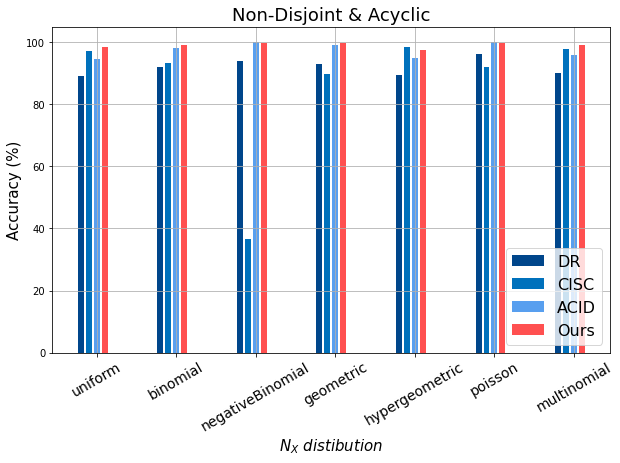

In [33]:
plt.figure(figsize=(10, 6))
i = 1
plt.bar(np.arange(i - .4, i + 13 - .4, 2), df_all.dr.values, label="DR", align="center", width=0.15, color="#00468b")
plt.bar(np.arange(i - .2, i + 13 - .2, 2), df_all.cisc.values, label="CISC", align="center", width=0.15, color="#0071bc")
plt.bar(np.arange(i - .0, i + 13 - .0, 2), df_all.acid.values, label="ACID", align="center", width=0.15, color="#589fef")
#plt.bar(np.arange(i + .2, i + 13 + .2, 2), df_all.crisp.values, label="CRISP", align="center", width=0.15, color="#589fef")
plt.bar(np.arange(i + .2, i + 13 + .2, 2), df_all.ndm.values, label="Ours", align="center", width=0.15, color="#ff5050")

plt.legend(loc="lower right")
plt.title("Non-Disjoint & Acyclic", fontsize=18)
plt.xticks(np.arange(1, 14, 2), df_all.dtype.values, fontsize=14, rotation=30)
plt.ylabel("Accuracy (%)", fontsize=15)
plt.xlabel(r"$N_X \ distibution$", fontsize=15)
plt.grid()
plt.show();

## 実験2

In [20]:
df3

NameError: name 'df3' is not defined

In [21]:
df3 = pd.read_table("results/2choice-nonidentifiable-acc-dtype.dat", skiprows=3)
df_all = pd.merge(df2, df3)

In [22]:
df_all

,dtype,dc,ent,dr,cisc,acid,crisp,ndm
0,uniform,49.9,92.7,89.2,97.1,94.6,100.0,99.5
1,binomial,21.3,94.6,92.0,93.4,98.1,100.0,99.6
2,negativeBinomial,28.4,60.0,94.0,36.5,100.0,100.0,99.8
3,geometric,6.3,92.2,92.9,89.6,98.9,99.9,99.8
4,hypergeometric,17.6,89.1,89.5,98.4,94.7,100.0,99.1
5,poisson,24.9,96.5,96.0,91.9,100.0,100.0,100.0
6,multinomial,44.4,93.4,90.1,97.6,95.7,100.0,99.5


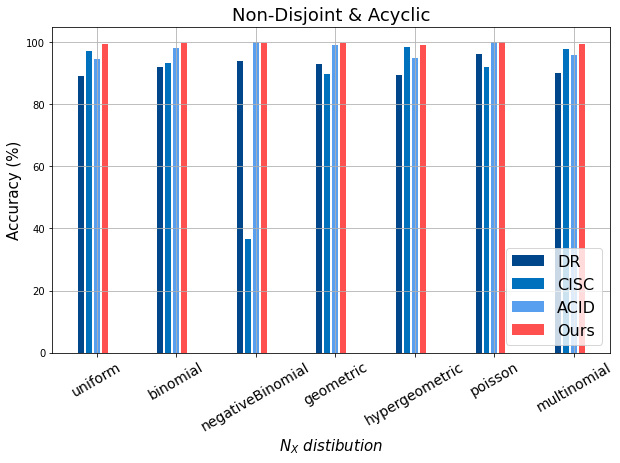

In [24]:
plt.figure(figsize=(10, 6))
i = 1
plt.bar(np.arange(i - .4, i + 13 - .4, 2), df_all.dr.values, label="DR", align="center", width=0.15, color="#00468b")
plt.bar(np.arange(i - .2, i + 13 - .2, 2), df_all.cisc.values, label="CISC", align="center", width=0.15, color="#0071bc")
plt.bar(np.arange(i - .0, i + 13 - .0, 2), df_all.acid.values, label="ACID", align="center", width=0.15, color="#589fef")
#plt.bar(np.arange(i + .2, i + 13 + .2, 2), df_all.crisp.values, label="CRISP", align="center", width=0.15, color="#589fef")
plt.bar(np.arange(i + .2, i + 13 + .2, 2), df_all.ndm.values, label="Ours", align="center", width=0.15, color="#ff5050")

plt.legend(loc="lower right")
plt.title("Non-Disjoint & Acyclic", fontsize=18)
plt.xticks(np.arange(1, 14, 2), df_all.dtype.values, fontsize=14, rotation=30)
plt.ylabel("Accuracy (%)", fontsize=15)
plt.xlabel(r"$N_X \ distibution$", fontsize=15)
plt.grid()
plt.show();

## 実験3

In [20]:

dd = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

In [21]:
for causal_type1 in ["to", "gets", "indep", "confounder"]:
    for causal_type2 in ["to", "gets", "indep", "confounder"]:
        for sample_size in [100, 1000, 10000, 100000]:
            if causal_type1 == causal_type2:
                dd[causal_type1][causal_type2][sample_size] = 1000
            else:
                dd[causal_type1][causal_type2][sample_size] = 0

In [22]:
dd["to"]["indep"][100] = 691
dd["to"]["to"][100] = 288
dd["to"]["gets"][100] = 21

dd["gets"]["to"][100] = 21
dd["gets"]["gets"][100] = 288
dd["gets"]["indep"][100] = 691

dd["indep"]["indep"][100] = 993
dd["indep"]["to"][100] = 3
dd["indep"]["gets"][100] = 4

dd["confounder"]["indep"][100] = 876
dd["confounder"]["indep"][1000] = 971
dd["confounder"]["indep"][10000] = 897
dd["confounder"]["indep"][100000] = 7

dd["confounder"]["gets"][100] = 56
dd["confounder"]["gets"][1000] = 15
dd["confounder"]["gets"][10000] = 36
dd["confounder"]["gets"][100000] = 0

dd["confounder"]["to"][100] = 68
dd["confounder"]["to"][1000] = 14
dd["confounder"]["to"][10000] = 43
dd["confounder"]["to"][100000] = 0

dd["confounder"]["confounder"][100] = 0
dd["confounder"]["confounder"][1000] = 0
dd["confounder"]["confounder"][10000] = 24
dd["confounder"]["confounder"][100000] = 993


In [23]:
sns.set(font_scale = 1.5)
causal_types = ["to", "gets", "indep", "confounder"]

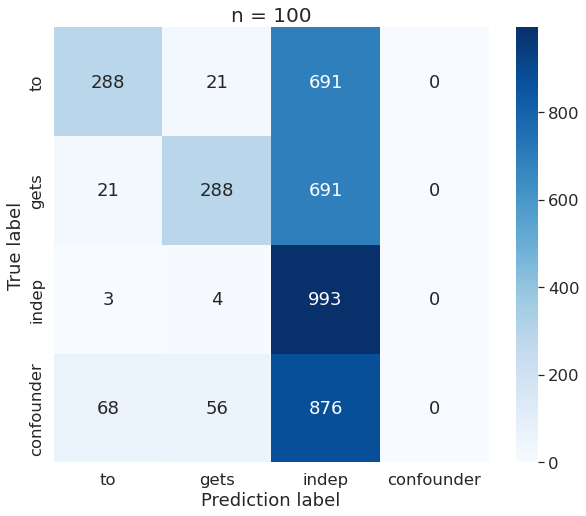

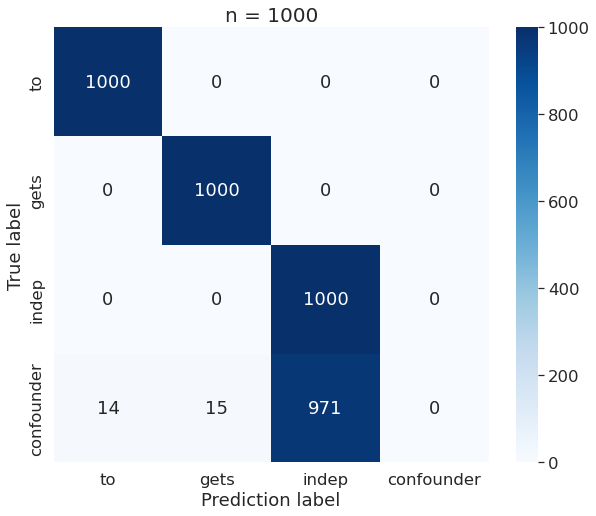

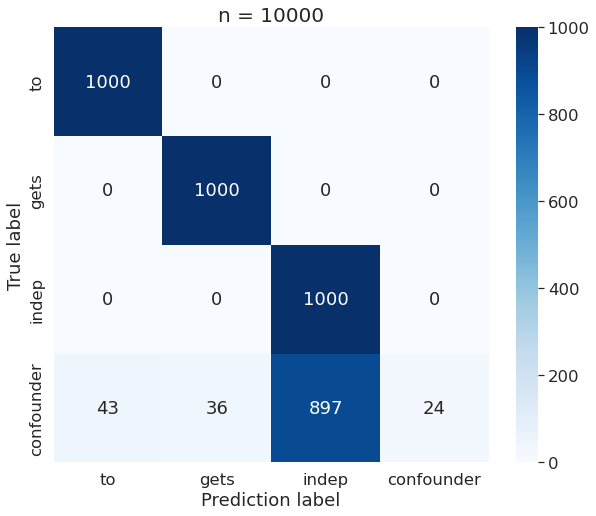

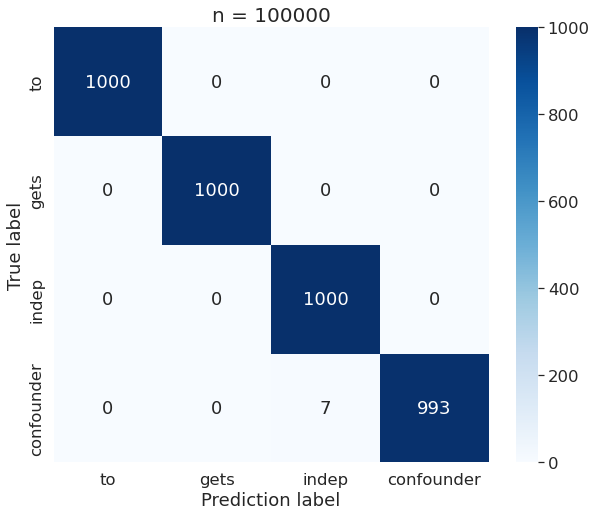

In [24]:
for sample_size in [100, 1000, 10000, 100000]:
    cm = [[0] * 4 for _ in range(4)]
    
    for i, causal_type1 in enumerate(causal_types):
        for j, causal_type2 in enumerate(causal_types):
            #print(causal_type1, causal_type2, dd[causal_type1][causal_type2][100])
            cm[i][j] = dd[causal_type1][causal_type2][sample_size]

    df_cm = pd.DataFrame(data=cm, index=causal_types, columns=causal_types)
    plt.figure(figsize=(10, 8))
    plt.title(f"n = {sample_size}", fontsize = 20)
    sns.heatmap(df_cm, annot=True, cmap="Blues", fmt="d", square=True, annot_kws={"fontsize":18})
    plt.xlabel("Prediction label", fontsize = 18)
    plt.ylabel("True label", fontsize = 18)
    plt.show();

In [66]:
causal_type	size	ndm
to	100	28.00
to	1000	100.0
to	10000	100.0
to	100000	100.0
gets	100	28.00
gets	1000	100.0
gets	10000	100.0
gets	100000	100.0
indep	100	0.00
indep	1000	100.0
indep	10000	100.0
indep	100000	100.0
confounder	100	0.00
confounder	1000	0.00
confounder	10000	2.40
confounder	100000	99.30

981
1000
1000
932


In [25]:
causal_type_acc_df = pd.read_table("results/fixed-dim-acc-nsize.dat")

In [26]:
causal_type_acc_df

,causal_type,size,ndm
0,to,100,28.0
1,to,1000,100.0
2,to,10000,100.0
3,to,100000,100.0
4,gets,100,28.0
5,gets,1000,100.0
6,gets,10000,100.0
7,gets,100000,100.0
8,indep,100,0.0
9,indep,1000,100.0


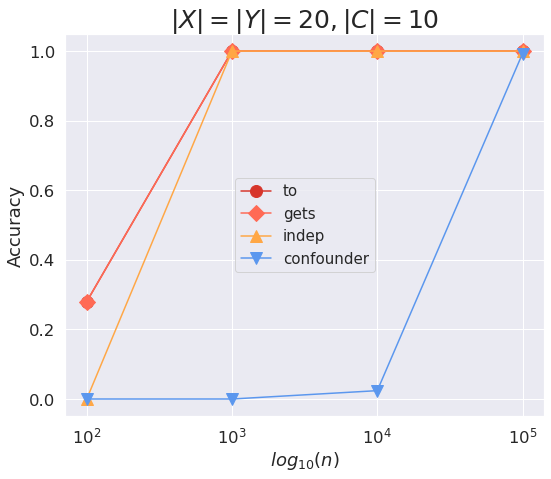

In [27]:
COLORS = ["#d7352b", "#ff6a55", "#ffa746", "#5b97ee"]#, "#5b97ee"]
MARKERS = ["o", "D", "^", "v"]

fig, ax = plt.subplots(figsize=(8, 7), tight_layout=True, facecolor="white")
ax.set_title(label=r"$|X| = |Y| = 20, |C| = 10$", fontsize=25)
#result_df = causal_type_acc_df[causal_type_acc_df["causal_type"]==causal_type]
#axes[j].plot(result_df["size"], result_df["ndm"] / 100, color=colors[i], label=causal_type, marker=MARKERS[i], markersize=8)
#plt.figure(figsize=(8, 6))
for causal_type, color, marker in zip(causal_types, COLORS, MARKERS):
    result_df = causal_type_acc_df[causal_type_acc_df["causal_type"]==causal_type]
    
    ax.plot(result_df["size"], result_df["ndm"] / 100, color=color, 
                 label=causal_type, marker=marker, markersize=12)


ax.set_xscale('log')
ax.legend(loc="best", fontsize=15)
ax.set_xlabel(r"$log_{10}(n)$", fontsize=18)
ax.set_ylabel("Accuracy", fontsize=18)
plt.show();

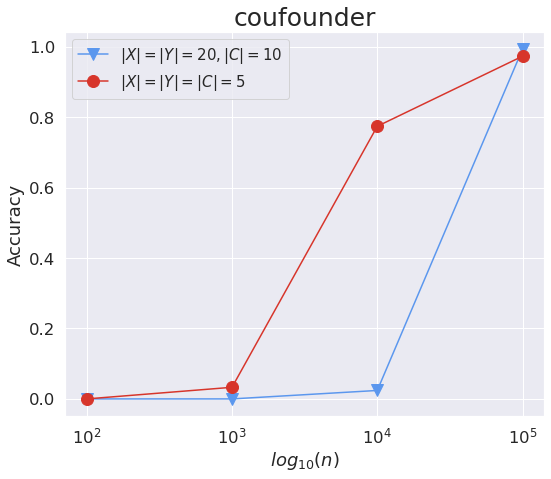

In [37]:

fig, ax = plt.subplots(figsize=(8, 7), tight_layout=True, facecolor="white")
ax.set_title(label="coufounder", fontsize=25)
#result_df = causal_type_acc_df[causal_type_acc_df["causal_type"]==causal_type]
#axes[j].plot(result_df["size"], result_df["ndm"] / 100, color=colors[i], label=causal_type, marker=MARKERS[i], markersize=8)
#plt.figure(figsize=(8, 6))
result_df = causal_type_acc_df[causal_type_acc_df["causal_type"]=="confounder"]
nsize = result_df["size"]
ax.plot(nsize, result_df["ndm"] / 100, color=COLORS[-1], marker=MARKERS[-1], markersize=12, label=r"$|X| = |Y| = 20, |C| = 10$")
ax.plot(nsize, np.array([0.0, 3.30, 77.40, 97.30]) / 100, color=COLORS[0], marker=MARKERS[0], markersize=12, label=r"$|X| = |Y| = |C| = 5$")


ax.set_xscale('log')
ax.legend(loc="best", fontsize=15)
ax.set_xlabel(r"$log_{10}(n)$", fontsize=18)
ax.set_ylabel("Accuracy", fontsize=18)
plt.show();